In [1]:
# Name: example_basic
# Authors: Stephan Meighen-Berger, Kruteesh Desai
# A basic example how to use the package

In [2]:
# imports
from config import config
from pone_aeff import Aeff
from dm2nu import DM2Nu
from atm_shower import Atm_Shower
from detectors import Detector
import numpy as np
import matplotlib.pyplot as plt
from limit_calc import Limits
from bkgrd_calc import Background
from signal_calc import Signal
from pdm import PDM
from scipy.interpolate import UnivariateSpline
from scipy.stats import chi2
import pickle

In [3]:
# picture path
PICS = '../pics/'
name=[r'$\nu_{\mu}$',r'$\nu_{e}$',r'$\nu_{\tau}$']

In [4]:
# Some example settings
#config['atmospheric showers']['interaction model'] = 'SIBYLL2.3c'
#config['atmospheric showers']['theta angles'] = np.linspace(0., 90., 91)
#config['atmospheric showers']['particles of interest']=['nue']
config['general']['detector'] = 'POne'
config["general"]["year"] = 7

In [5]:
pdm = PDM()

POne


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)
/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:346: RuntimeWarning: overflow encountered in multiply
  return A * aa * dd
100%|██████████| 3/3 [00:00<00:00,  4.70it/s]


In [6]:
# Grids
mass_grid = config['simulation parameters']['mass grid']
sv_grid = config['simulation parameters']['sv grid']
# The limit calculation


In [7]:
pickle.dump(pdm.signal,open('../data/pone_signal.pkl','wb'))

In [8]:
dphi_4=np.loadtxt(open("../data/m_1e4.csv"), delimiter = ",")
dphi_4[dphi_4[:,0].sort()]
dphi_6=np.loadtxt(open("../data/m_1e6.csv"), delimiter = ",")
dphi_6[dphi_6[:,0].sort()]
dphi_ice=np.loadtxt(open("../data/icecube.csv"), delimiter = ",")
dphi_ice[dphi_ice[:,0].sort()]

array([[[2.12522998e+02, 1.63541848e-04],
        [3.75355026e+02, 1.17293567e-04],
        [6.29536175e+02, 4.82400307e-05],
        [1.29846584e+03, 2.68117327e-05],
        [2.54321174e+03, 1.27334869e-05],
        [5.08126850e+03, 5.00379406e-06],
        [1.02741133e+04, 1.64695632e-06],
        [2.01231674e+04, 6.33333228e-07],
        [4.15055504e+04, 3.04185979e-07],
        [8.12939394e+04, 1.45312927e-07],
        [1.64454709e+05, 5.65882534e-08],
        [2.78806881e+05, 4.47804058e-08],
        [4.21663736e+05, 3.16824398e-08],
        [7.56379773e+05, 2.36346234e-08],
        [1.97223492e+06, 1.29547786e-08]]])

In [9]:
dphi=UnivariateSpline(dphi_4[:,0],dphi_4[:,1],k=1,s=0,ext=1)
dphi_ic=UnivariateSpline(dphi_ice[:,0],dphi_ice[:,1],k=1,s=0,ext=1)
dphi_16=UnivariateSpline(dphi_6[:,0],dphi_6[:,1],k=1,s=0, ext=1)


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


(100.0, 1100000.0)

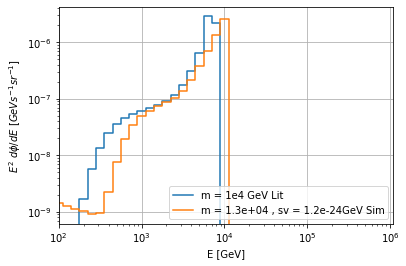

In [10]:
mass_id = 8
sv_id = 15
plt.step(pdm._shower_sim._egrid, dphi(pdm._shower_sim._egrid), label='m = 1e4 GeV Lit')
plt.step(pdm._shower_sim.egrid, pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid, mass_grid[mass_id], sv_grid[sv_id]) * pdm._shower_sim.egrid**2.,
         label='m = %.1e , sv = %.1eGeV Sim'%(mass_grid[mass_id],sv_grid[sv_id]))

plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$E^2$ $d\phi/dE$ $[GeV s^{-1} sr^{-1}]$')
plt.xlabel('E [GeV]')
plt.legend()
plt.grid()
plt.xlim(1e2, 1.1e6)

In [11]:
flux={}
flux[15] = (dphi(pdm._shower_sim.egrid)) * pdm._shower_sim._egrid**(-2)
flux[85] = flux[15]
flux[125] = flux[15]
_lit=pdm._Detector.sim2dec(flux,True)["numu"]

In [12]:
# Plotting standards
std_size = 15.  # Size of the plot
fontsize = 25.  # Fontsize in the plot
lw=0.5  # Linewidth
h_length=0.5  # Handle length for the legends
export_dpi = 500  # Dpi for the image export

In [13]:
th_cl = np.loadtxt(open("../data/thermal_relic.csv"), delimiter = ",")
angle_grid = np.logspace(0,90,91)

In [14]:
signal_ice = pickle.load(open('/home/kruteesh/Desktop/dm_data_server/limits_signal_IceCube.pkl','rb'))


In [15]:
J = pdm._dm_nu._const.J_d1+pdm._dm_nu._const.J_s1+pdm._dm_nu._const.J_p1
gal={}
extra={}
extra[15]=extra[85]=extra[125]=pdm._dm_nu.extra_galactic_flux(pdm._shower_sim.egrid,mass_grid[mass_id],sv_grid[sv_id])
gal[15]=gal[85]=gal[125]=pdm._dm_nu.galactic_flux(pdm._shower_sim.egrid,mass_grid[mass_id],sv_grid[sv_id],2,J)

/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


/home/kruteesh/Desktop/DM_nu_simulation_P-One/PONE_git/pone_work/pone_dm/dm2nu.py:345: RuntimeWarning: overflow encountered in exp
  dd = np.exp(d_2 / s_in(x)**2)


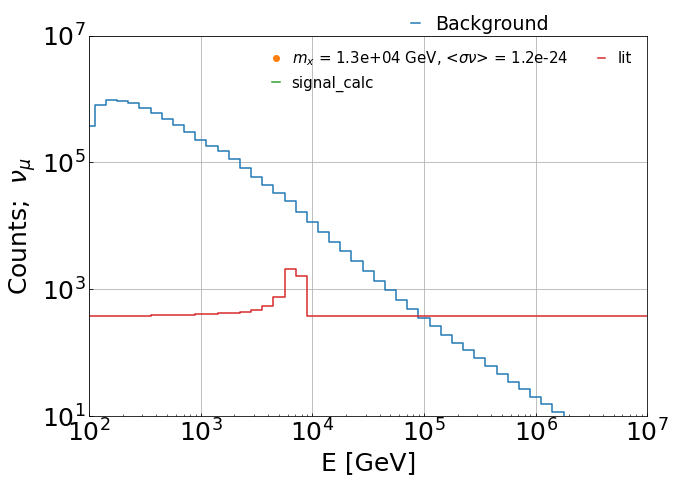

In [16]:
# plotting the Counts----
for j,i in enumerate(config['atmospheric showers']['particles of interest'][:1]):
    # Particle counts
    # ---------------------------------------------
    # Setup
    figure, ax1 = plt.subplots(1, 1, figsize=(10,7), sharey=True)
    # ---------------------------------------------
    # Plotting
    #ax1.step(pdm._shower_sim._egrid,_lit ,label='m = 1e4 GeV Lit')
    #ax1.step(pdm._shower_sim._egrid, ,label='IceCube Background')
    ax1.step(pdm._shower_sim.egrid,
             pdm._limit_calc._bkgrd[i],
             label='Background')
    yy = pdm.signal[sv_id][mass_id] 
    ax1.step(pdm._shower_sim.egrid[-len(yy):],
             yy,"o",
             label=r'$m_{x}$ = %.1e GeV, <$\sigma\nu$> = %.1e' %(mass_grid[mass_id], sv_grid[sv_id]))
    
    #ax1.step(pdm._shower_sim.egrid,pdm._Detector.sim2dec(extra, boolean_sig=True)["numu"], label="extra")
    #ax1.step(pdm._shower_sim.egrid,pdm._Detector.sim2dec(gal, boolean_sig=True)["numu"], label="gal")
    ax1.step(pdm._shower_sim.egrid,pdm._signal.signal_calc(pdm._shower_sim.egrid,mass_grid[mass_id],sv_grid[sv_id]), label="signal_calc")
    ax1.step(pdm._shower_sim.egrid[-len(_lit):],_lit,label="lit")
   
   
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    ax1.set_xlabel(r"E [GeV]", fontsize=fontsize)
    ax1.set_ylabel("Counts;  " + name[j], fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
    ax1.set_ylim(1e1, 1e7)
    ax1.set_xlim(1e2, 1e7)
    #elif j==2:
    #    ax1.set_ylim(1e0, 1e4)
    #    ax1.set_xlim(1e2, 1e7)
    #
    # ---------------------------------------------
    # Legend
    h, l = ax1.get_legend_handles_labels()
    
    lgd1 = ax1.legend([h[0]], [l[0]], loc=9, bbox_to_anchor=(0.7, +1.1),
                      ncol=2, fontsize=fontsize-6, handlelength=h_length,
                      fancybox=True, frameon=False)
    lgd2 = ax1.legend(h[1:], l[1:], loc=9, bbox_to_anchor=(0.65, +1.0),
                      ncol=2, fontsize=fontsize-10, handlelength=h_length,
                      fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    # ---------------------------------------------
    # Showing the image
    plt.grid()
    plt.show()
    
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Flux_Example_"+i+".png",
                   bbox_inches='tight', dpi=export_dpi)

In [17]:
test_chi2 = {}
for i in config["pone"]["specific particle scaling"].keys():
    test_chi2[i] = np.array([[
        (pdm._signal._signal_calc(pdm._shower_sim._egrid,mass_grid[mass_id],sv_grid[sv_id],angle_grid)[pdm._limit_calc._t_d:] /
        pdm._limit_calc._bkgrd[i][pdm._limit_calc._t_d:] for mass_id in range(0, len(mass_grid)))
        ] for sv_id in range(0, len(sv_grid))])

In [18]:
# Loading comparison data
cl_lit = np.loadtxt('../data/CL_PONE.csv', delimiter=",")
cl_lit = (cl_lit[cl_lit[:, 0].argsort()])

In [19]:
pdm.results['numu'][0]

array([0.0093449 , 0.17497728, 0.05230341, 0.25827042, 0.09201319,
       0.38037711, 0.67995559, 0.57914649, 0.81232318, 0.9260193 ,
       0.91012808, 0.96769675, 0.96591812, 0.98876967, 0.99775247,
       0.99973929, 0.99995857, 0.99999116, 0.99999776, 0.99999942,
       0.99999987, 0.99999997, 0.99999999, 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ])

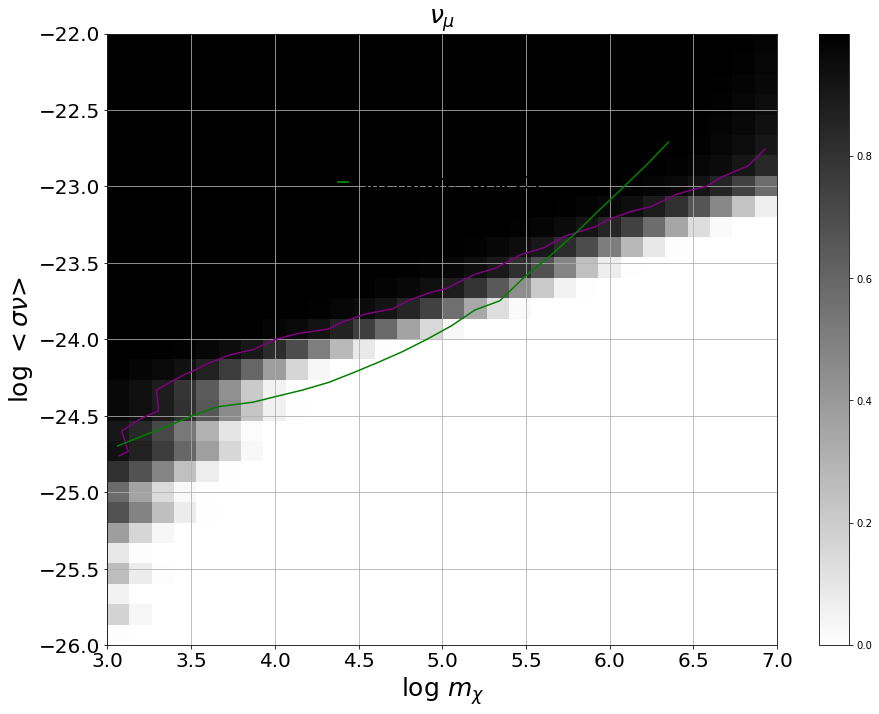

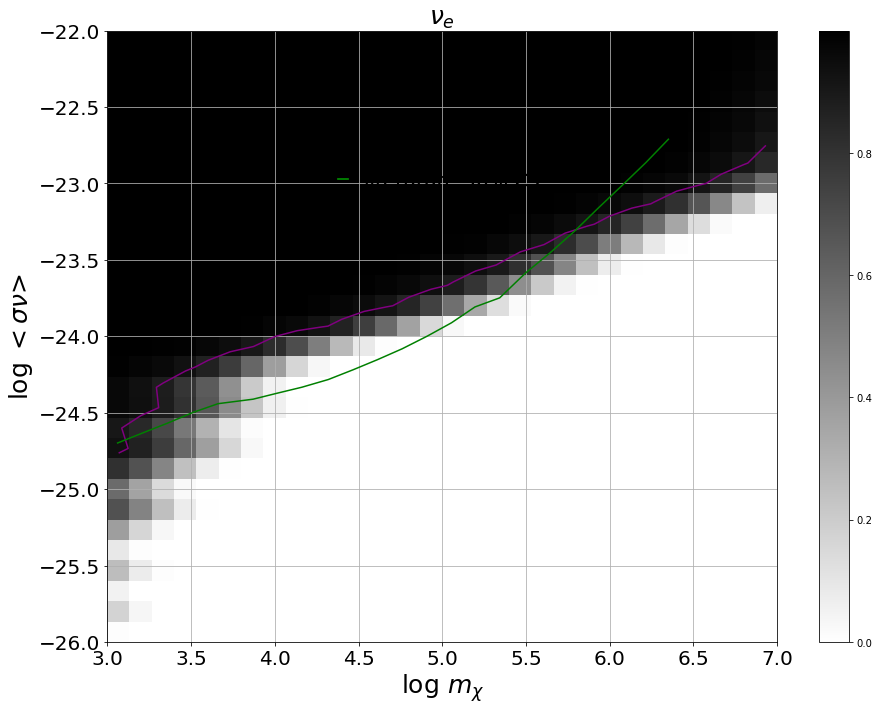

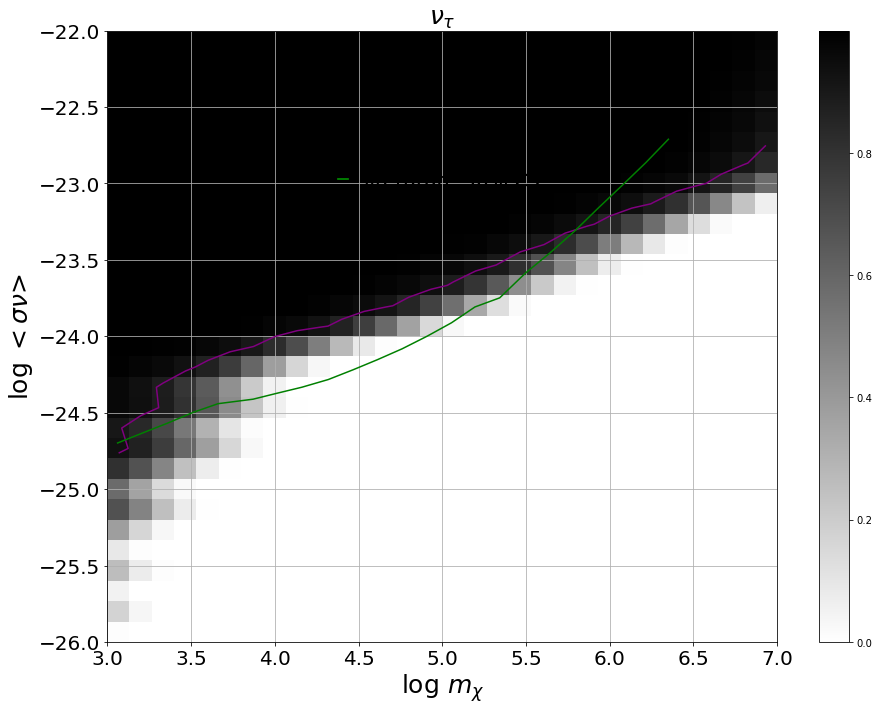

In [23]:
for j,i in enumerate(config["pone"]["specific particle scaling"].keys()):
    # Limits
    # ---------------------------------------------
    # Setup

    figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
    # ---------------------------------------------
    # Plotting
    plt.title(name[j],fontsize=fontsize)
    ax1.contour(pdm.results[i].T, levels = [0.9], colors='purple',
                origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                        min(np.log10(sv_grid)), max(np.log10(sv_grid))))
    pos = ax1.imshow(pdm.results[i].T, extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                              min(np.log10(sv_grid)), max(np.log10(sv_grid))),
                     origin='lower', aspect='auto',cmap=plt.cm.binary)
    figure.colorbar(pos, ax=ax1)
    ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
    # ---------------------------------------------
    # Axis options
    ax1.set_xscale("linear")
    ax1.set_yscale("linear")
    ax1.set_xlabel(r"$\log$ $m_{\chi}$", fontsize=fontsize)
    ax1.set_ylabel(r"$\log$ $<\sigma \nu$>", fontsize=fontsize)
    ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5)
    ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5)
    ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
    ax1.set_ylim(min(np.log10(sv_grid)), max(np.log10(sv_grid)))
    # ---------------------------------------------
    # Legend
    # plt.legend(fontsize=fontsize)
    h, l = ax1.get_legend_handles_labels()
    lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.5, +0.8),
                     ncol=2, fontsize=fontsize-5, handlelength=h_length,
                     fancybox=True, frameon=False)
    ax1.add_artist(lgd1)
    plt.grid()
    # ---------------------------------------------
    # Showing the image
    plt.show()
    # ---------------------------------------------
    # Storing the image
    figure.savefig(PICS + "Limits_Example_"+i+".png",
                   bbox_inches='tight', dpi=export_dpi)


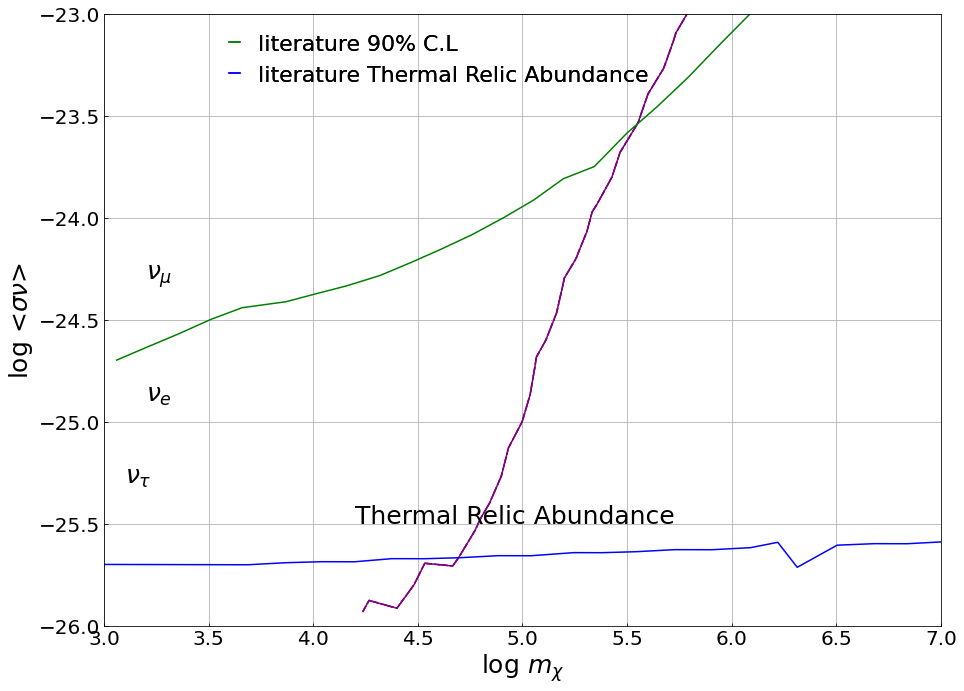

In [21]:
# All Limits-------------------------------------------
# Setup
figure, (ax1) = plt.subplots(1, 1, figsize=(std_size, std_size * 6. / 8.), sharex=True)
# ---------------------------------------------
# Plotting
ax1.contour(pdm.results["numu"], levels = [0.9], colors='purple', linestyles='-',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nue"], levels = [0.9], colors='purple', linestyles='--',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.contour(pdm.results["nutau"], levels = [0.9], colors='purple', linestyles='-.',
            origin='lower', extent=(min(np.log10(mass_grid)), max(np.log10(mass_grid)),
                                    min(np.log10(sv_grid)), max(np.log10(sv_grid))))
ax1.plot(np.log10(cl_lit[:, 0]), np.log10(cl_lit[:, 1]), 'g', label='literature 90% C.L')
ax1.plot(np.log10(th_cl[:, 0]), np.log10(th_cl[:, 1]), 'b', 
         label='literature Thermal Relic Abundance')
# ---------------------------------------------
# Axis options
ax1.set_xscale("linear")
ax1.set_yscale("linear")
ax1.set_xlabel(r"log $m_{\chi}$", fontsize=fontsize)
ax1.set_ylabel(r"log <$\sigma\nu$>", fontsize=fontsize)
ax1.tick_params(axis = 'both', which = 'major', labelsize=fontsize-5, direction='in')
ax1.tick_params(axis = 'both', which = 'minor', labelsize=fontsize-5, direction='in')
ax1.set_xlim(min(np.log10(mass_grid)), max(np.log10(mass_grid)))
ax1.set_ylim(min(np.log10(sv_grid)),-23.0)
# ---------------------------------------------
# Legend
# plt.legend(fontsize=fontsize)
h, l = ax1.get_legend_handles_labels()
lgd1 = ax1.legend(h, l, loc=9, bbox_to_anchor=(0.4, +1.),
                 ncol=1, fontsize=fontsize-3, handlelength=h_length,
                 fancybox=True, frameon=False)
ax1.add_artist(lgd1)
# ---------------------------------------------
ax1.text(3.2, -24.3, r"$\nu_\mu$", fontsize=fontsize)
ax1.text(3.2, -24.9, r"$\nu_e$", fontsize=fontsize)
ax1.text(3.1, -25.3, r"$\nu_\tau$", fontsize=fontsize)
ax1.text(4.2, -25.5, "Thermal Relic Abundance", fontsize=fontsize)
plt.grid()
# ---------------------------------------------
# Showing the image
plt.show()
# ---------------------------------------------
# Storing the image
figure.savefig(PICS + "All_Limits.png",
               bbox_inches='tight', dpi=export_dpi)